# Autoregressive Model - AR(p)

It is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.**This tutorial shows an AR(p) model and its parameter optimization using Least Squares Method.**

An $AR(p)$ model

$X_t = \sum^{p}_{i = 1}\Phi_i X_{t-i}$

assuming the mean is zero and the process is stationary.

Let $\hat{x}$ be the predicted value of $x_t$ and define squared error:

$f(x) = \sum^{n}_{i=0}(\hat{x}_i - x_i)^2$ in order to minimize this (optimizing weights), take derivatives with respect to each weight (coefficient).

$\dfrac{\partial f(x)}{\partial a_1} = \sum^{n}_{t=0}x_{t-1}(\hat{x}_t - x_t)$

$\dfrac{\partial f(x)}{\partial a_2} = \sum^{n}_{t=0}x_{t-2}(\hat{x}_t - x_t)$

$\dfrac{\partial f(x)}{\partial a_3} = \sum^{n}_{t=0}x_{t-3}(\hat{x}_t - x_t)$

$\dots$

These derivatives must be taken p times, with p being the number of terms in the equation. Then, plug $\hat{x}$ and simplify. For example, the final matrix form of a polynomial fit with 2 terms would be:


$\begin{bmatrix} \sum^{}_{}x_{t-1}^2 & \sum^{}_{}x_{t-1}x_{t-2} \\ \sum^{}_{}x_{t-1}x_{t-2} & \sum^{}_{}x_{t-2}^2\end{bmatrix}$ $\begin{bmatrix} a_1 \\ a_2\end{bmatrix}$ = $\begin{bmatrix} \sum^{}_{}x_tx_{t-1} \\ \sum^{}_{}x_tx_{t-2}\end{bmatrix}$

for simplicity, denote these with:

$XW = Y$

then to find $W$:

$X^{-1}XW = X^{-1}Y$

which will result in

$W = X^{-1}Y$

so **we will calculate $W$ and use for AR(p) model.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.ndimage.interpolation import shift
from sklearn.model_selection import train_test_split

In [2]:
p = 3 # amount of past dependency

In [3]:
def prepare(x,p):
    return np.asarray([shift(x,i,cval=np.nan) for i in range(p)]).T

def f(x):
    return np.dot(x,phi).ravel()

In [4]:
# data generation
x = np.linspace(0,4*np.pi,100)
y = np.sin(x)*5 + np.random.randn(100)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,shuffle=False)

In [5]:
mu = np.mean(y_train)
y_train = y_train - mu

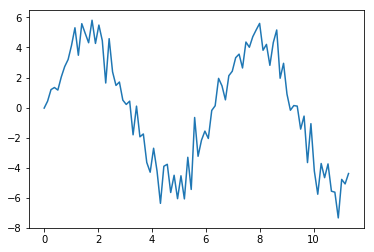

In [6]:
# first look
plt.plot(x_train,y_train)

In [7]:
XT = prepare(y_train,p+1)
XT = XT[np.all(~np.isnan(XT),axis=1)]

In [8]:
X1 = np.zeros((p,p))

for i in range(p-1):
    for j in range(i+1,p):
        X1[i,j] = np.sum(XT[:,i+1]*XT[:,j+1])

X1 = X1 + X1.T # sum with transpose, it is symmetric about diagonal

for i in range(p):
    X1[i,i] = np.sum(XT[:,i+1]**2)

In [9]:
X2 = np.asarray([np.sum(XT[:,0]*XT[:,i]) for i in range(p)])

In [10]:
phi = np.dot(np.linalg.inv(X1),X2)
print(phi)

[0.98212179 0.02040066 0.01640604]


In [11]:
# prepare data to use in model - just adding new columns by shifting one
X = prepare(y_train,p)

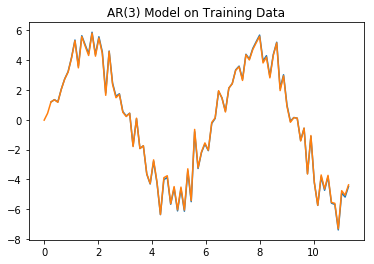

In [12]:
plt.plot(x_train,f(X))
plt.plot(x_train,y_train)
plt.title('AR({}) Model on Training Data'.format(p))
plt.show()

In [13]:
X = prepare(y_test,p)

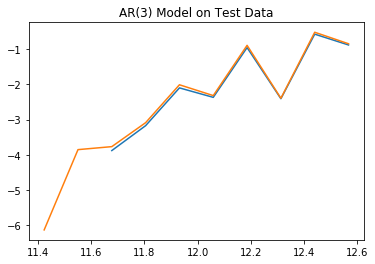

In [14]:
# out of sample predictions
plt.plot(x_test,f(X))
plt.plot(x_test,y_test)
plt.title('AR({}) Model on Test Data'.format(p))
plt.show()